In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [22]:
df = pd.read_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    204 non-null    object 
 1   value   204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [23]:
df['date']=pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    204 non-null    datetime64[ns]
 1   value   204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


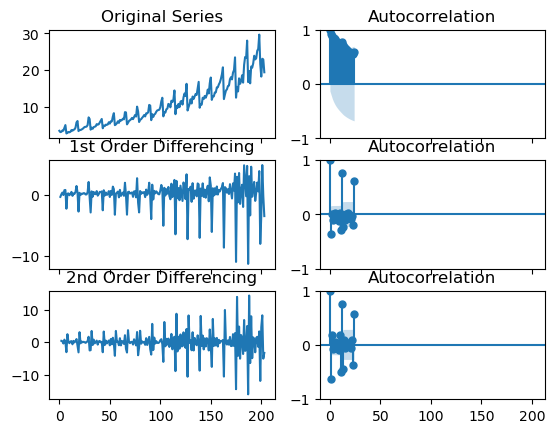

In [24]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['value'].dropna())

(3.145185689306732,
 1.0,
 15,
 188,
 {'1%': -3.465620397124192,
  '5%': -2.8770397560752436,
  '10%': -2.5750324547306476},
 549.6705685364172)

In [26]:
df['firstdiff']=df['value'].diff()
adfuller(df['firstdiff'].dropna())

(-2.495172147449741,
 0.11665341686468739,
 15,
 187,
 {'1%': -3.465811691080702,
  '5%': -2.877123351472649,
  '10%': -2.5750770662586864},
 547.1880809726354)

(-10.292304706517196, 3.5439163585318664e-18, 14, 187, {'1%': -3.465811691080702, '5%': -2.877123351472649, '10%': -2.5750770662586864}, 548.8960194373399)


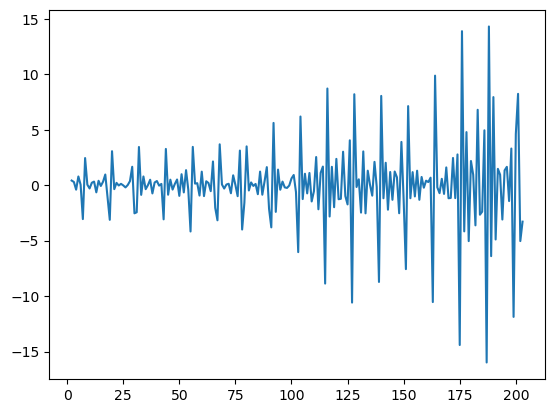

In [27]:
df['seconddiff']=df['value'].diff().diff()
print(adfuller(df['seconddiff'].dropna()))
plt.plot(df['seconddiff'])

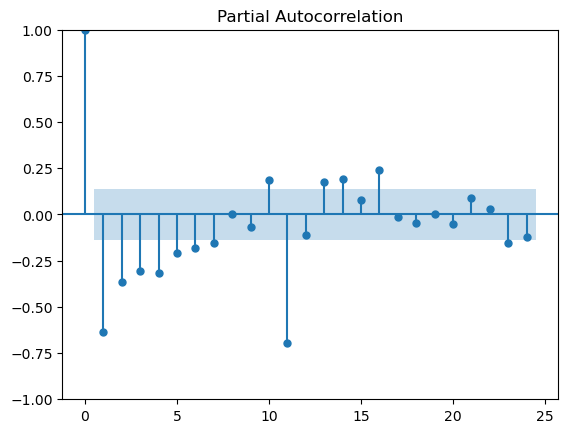

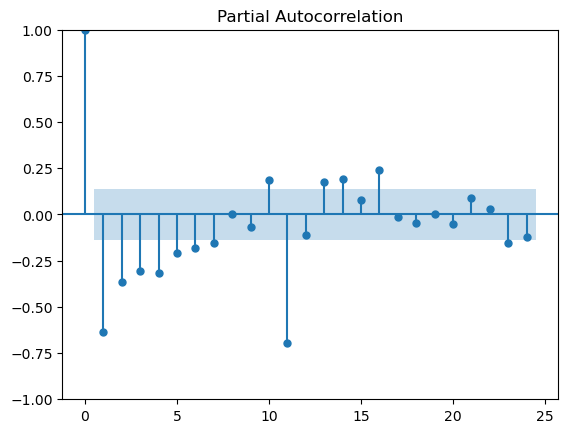

In [28]:
plot_pacf(df['seconddiff'].dropna())

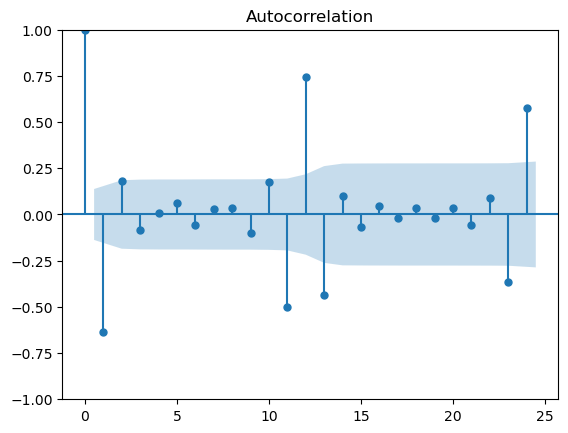

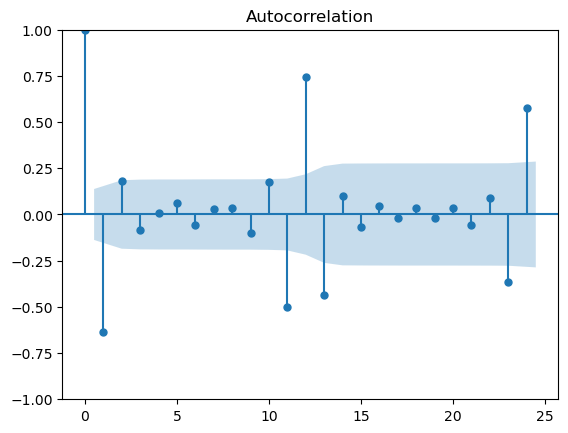

In [29]:
plot_acf(df['seconddiff'].dropna())

In [30]:
train = df[:round(len(df)*70/100)]
test = df[round(len(df)*70/100):]

In [41]:

model = ARIMA(train['value'],order=(1,2,1)) # Parameters: p, d, q
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
test['arimaPred'] = prediction
print(df.tail())

          date      value  firstdiff  seconddiff  arimaPred
199 2008-02-01  21.654285  -8.011071  -11.870337  15.529823
200 2008-03-01  18.264945  -3.389340    4.621731  15.590652
201 2008-04-01  23.107677   4.842732    8.232072  15.651480
202 2008-05-01  22.912510  -0.195167   -5.037899  15.712309
203 2008-06-01  19.431740  -3.480770   -3.285603  15.773137


/tmp/ipykernel_24623/2455374678.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred'] = prediction


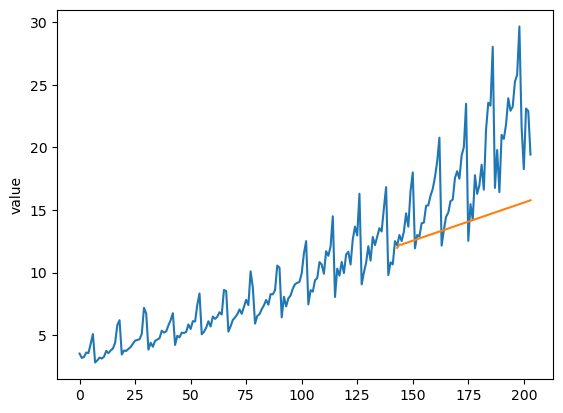

In [43]:
sns.lineplot(data=df,x=df.index,y='value')
sns.lineplot(data=test,x=test.index,y='arimaPred')
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test['value'], prediction))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 5.375


In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [58]:
model = SARIMAX(train['value'],order=(1,2,1),seasonal_order=(1,2,1,36)) # Parameters: p, d, q
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
test['sarimaPred'] = prediction
print(df.tail())

/home/user/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/user/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17220D+00    |proj g|=  6.22795D-01


 This problem is unconstrained.



At iterate    5    f=  8.16561D-01    |proj g|=  5.72679D-02

At iterate   10    f=  7.80541D-01    |proj g|=  1.53164D-02

At iterate   15    f=  7.76753D-01    |proj g|=  2.42601D-03

At iterate   20    f=  7.76328D-01    |proj g|=  2.01175D-03

At iterate   25    f=  7.76189D-01    |proj g|=  1.35125D-03

At iterate   30    f=  7.76117D-01    |proj g|=  2.71440D-03

At iterate   35    f=  7.76069D-01    |proj g|=  2.56499D-03

At iterate   40    f=  7.76054D-01    |proj g|=  2.92595D-04

At iterate   45    f=  7.76047D-01    |proj g|=  1.10392D-03


/home/user/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.76040D-01    |proj g|=  3.26531D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     64      1     0     0   3.265D-04   7.760D-01
  F =  0.77604032337196749     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
          date      value  firstdiff  seconddiff  arimaPred
199 2008-02-01  21.654285  -8.011071  -11.870337  15.529823
200 2008-03-01  18.264945  -3.389340    4.621731  15.590652
201 2008-04-01  23.107677   4.842732    8.232072  15.651480
202 2008-05-01  22.912510  -0.195167   -5.037899  15.712309
203 2008-06-01  19.431740  -3.480770   -3.285603  15.773137


/tmp/ipykernel_24623/3483557927.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sarimaPred'] = prediction


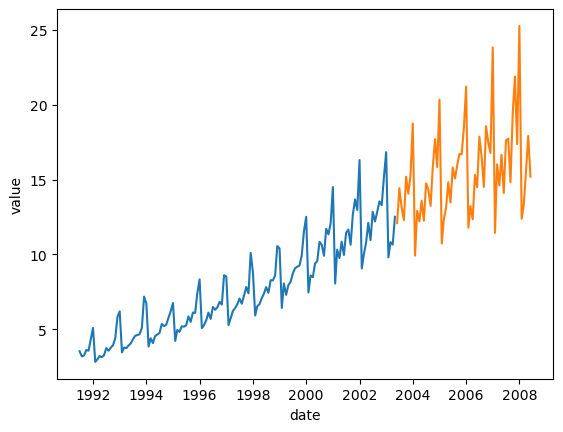

In [59]:
sns.lineplot(data=train,x='date',y='value')
sns.lineplot(data=test,x='date',y='sarimaPred')
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test['value'], prediction))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3.533
